# Sahraj Singh




## Research question/interests

With this research project I plan to identify trends based on age, race, gender, location and other important factors such as if the victims showed signs of mental illness in police shooting scenarios in the United States of America from 2015-2022. By analysing this data we can find patterns in shootings and the general response of the police towards the public. This analysis can help identify where reform is required and act as groundwork to bring said reform. My goal for this project is to  find the most safe and unsafe circumstances for the general public in terms of police shootings.  

## Task 1: Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

### Preview of the dataset:

In [ ]:
raw_df= pd.read_csv("../data/US Police shootings in from 2015-22 2.csv")
raw_df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7724,7725,NaN,2022-09-07,shot,screwdriver,NaN,M,NaN,Flagstaff,AZ,False,other,Foot,False,-111.584,35.224,True
7725,7726,NaN,2022-09-07,shot,gun,NaN,M,W,Springville,AL,False,attack,Car,False,-86.472,33.775,True
7726,7727,NaN,2022-09-07,shot,knife,61.0,M,B,St. Louis,MO,False,other,Not fleeing,False,-90.290,38.668,True
7727,7728,Tyler Michael Gardner,2022-09-07,shot,gun,27.0,M,NaN,Washington County,TN,False,attack,Other,False,-82.539,36.309,True


### Below are the columns of our raw dataset: 

In [ ]:
raw_df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

This is a list of the parameters that we will be working with or building on in this analysis.

### Number of uniquie values in each column:


In [ ]:
raw_df.nunique(axis=0)

id                         7729
name                       7280
date                       2620
manner_of_death               2
armed                       104
age                          81
gender                        2
race                          6
city                       3148
state                        51
signs_of_mental_illness       2
threat_level                  3
flee                          4
body_camera                   2
longitude                  6031
latitude                   5330
is_geocoding_exact            2
dtype: int64

### Number of non null values in each column:

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7729 entries, 0 to 7728
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7729 non-null   int64  
 1   name                     7312 non-null   object 
 2   date                     7729 non-null   object 
 3   manner_of_death          7729 non-null   object 
 4   armed                    7520 non-null   object 
 5   age                      7247 non-null   float64
 6   gender                   7709 non-null   object 
 7   race                     6269 non-null   object 
 8   city                     7729 non-null   object 
 9   state                    7729 non-null   object 
 10  signs_of_mental_illness  7729 non-null   bool   
 11  threat_level             7729 non-null   object 
 12  flee                     6854 non-null   object 
 13  body_camera              7729 non-null   bool   
 14  longitude               

By comparing the previous 2 tables we can make some basic deductions. Firstly the number of null values are low which indicates a relatively complete dataset. There are 7312 names in the "Name" column but only 7280 unique names. This means, 32 victims share the same name as other victims. Also, there are 2,620 unique dates in a timespan of 2,922 days. This means there were 300 days from 2015-2022 with no reported shootings.

### Number of police shootings based on state:

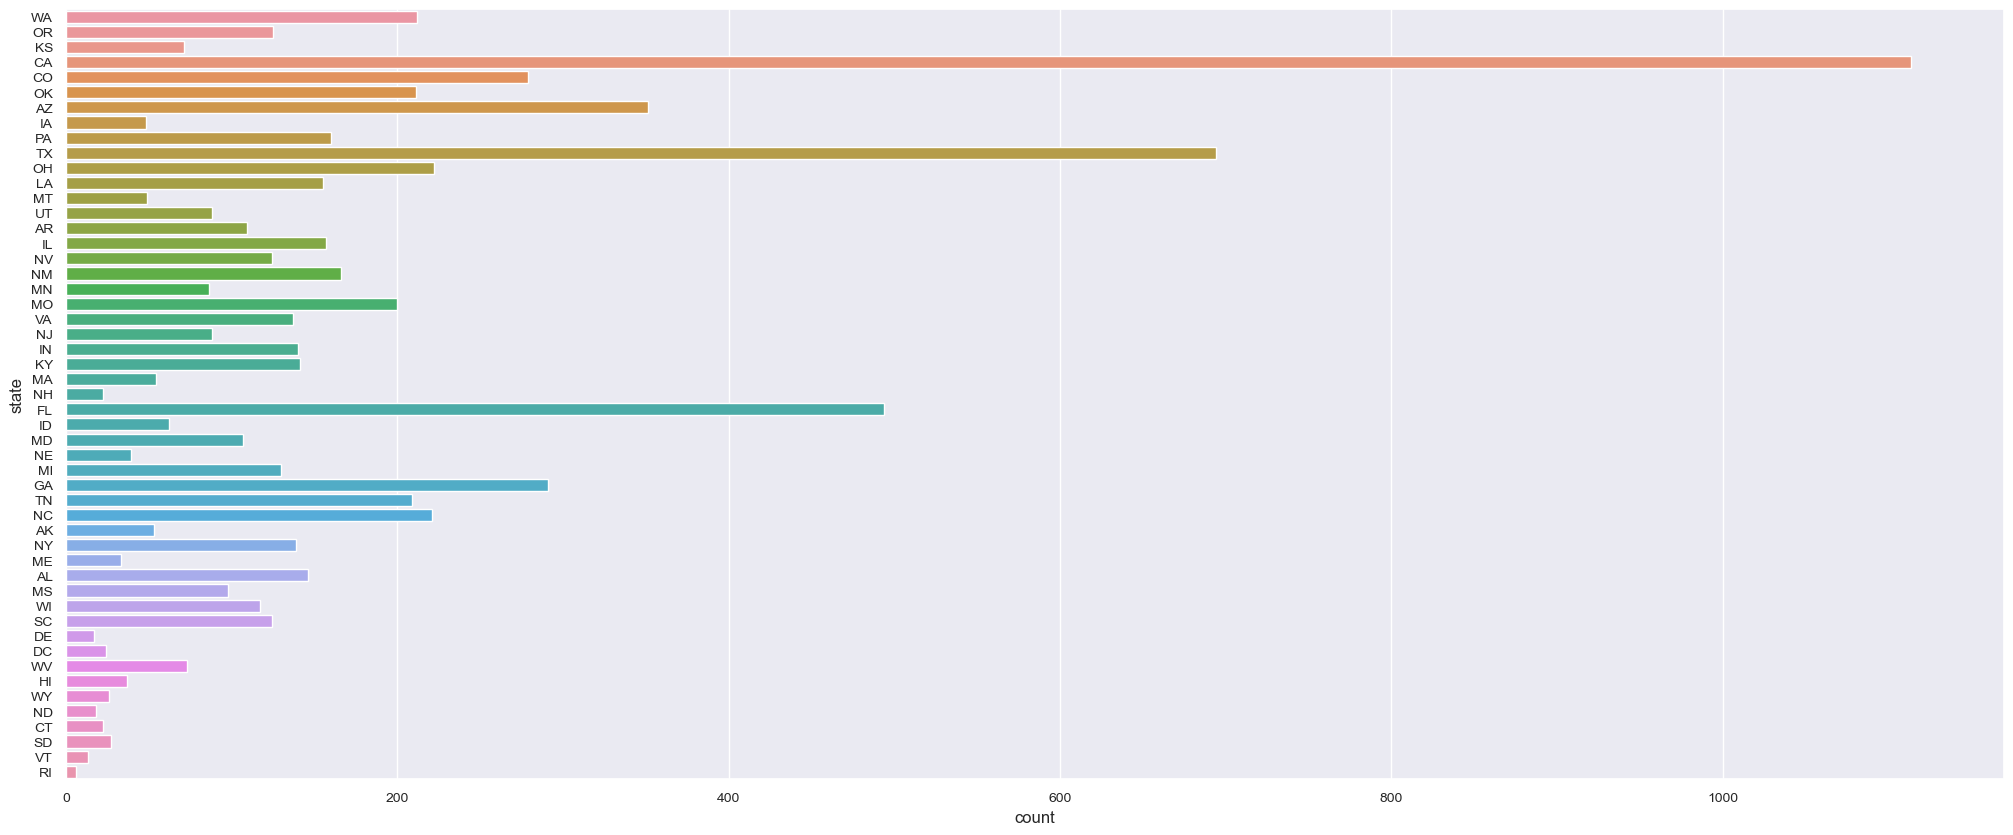

In [ ]:
state_plot = sns.countplot(y=raw_df["state"])
sns.set(rc={'figure.figsize':(25,8)})
state_plot.tick_params(labelsize=10)


From this graph we can see that the US state with the highest number of police shootings from 2015-2022 was California(CA) and the state with the lease incidents was Rhode island.

Ratio of Male and Female victims:

M    7361
F     348
Name: gender, dtype: int64

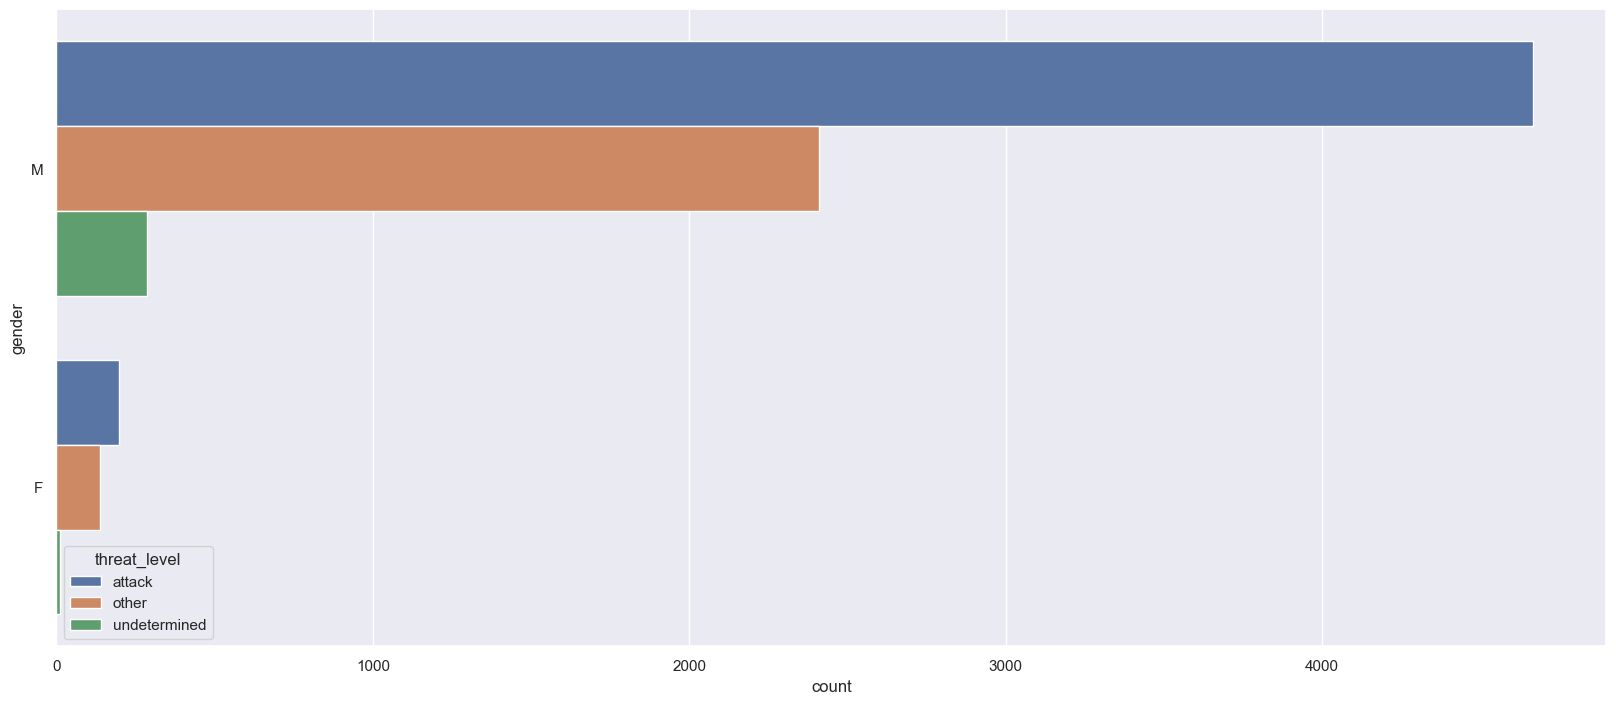

In [ ]:
sns.countplot(y=raw_df["gender"], hue=raw_df["threat_level"])
raw_df.gender.value_counts()

31.0    254
32.0    252
27.0    249
34.0    247
33.0    242
       ... 
78.0      1
89.0      1
8.0       1
92.0      1
2.0       1
Name: age, Length: 81, dtype: int64

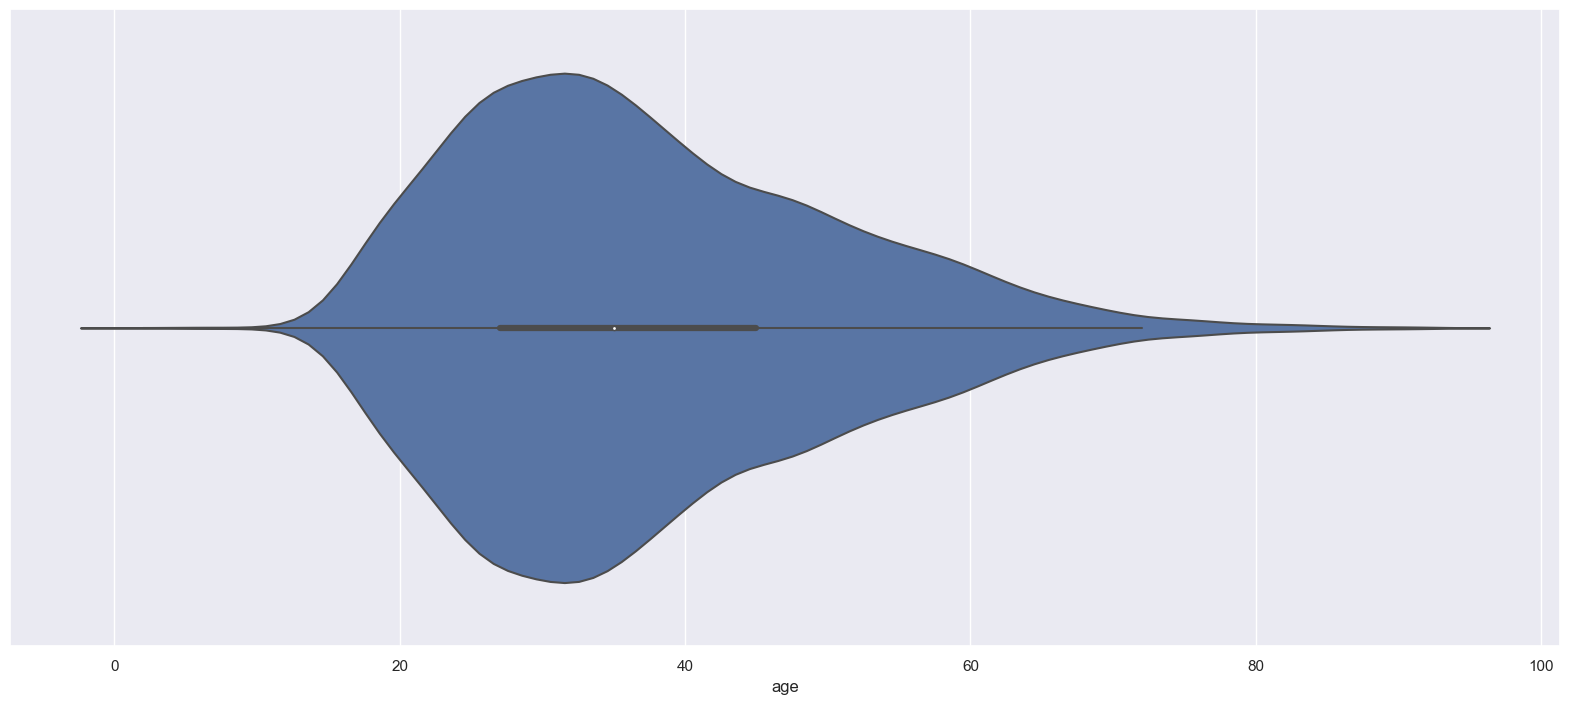

In [ ]:
sns.violinplot(x=raw_df["age"])
raw_df.age.value_counts()

## Task 2: Analysis Pipeline

To clean up my data, I will start by removing columns that are not useful for my analysis. 

In [ ]:
clean_data = raw_df.drop(['id','longitude','latitude','is_geocoding_exact', 'name', 'manner_of_death', 'body_camera' ], axis=1)
clean_data.head()

,date,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee
0,2015-01-02,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing
1,2015-01-02,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing
2,2015-01-03,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing
3,2015-01-04,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing
4,2015-01-04,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing


Next I will add some external data to help with my analysis. To do this I will first load the external datasets.